In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from scipy.integrate import simpson
from matplotlib import pyplot as plt
from activations import hard, soft, soft_q, hard_q, correlation_map
from itertools import product

In [4]:
import os, sys
dir = os.getcwd()

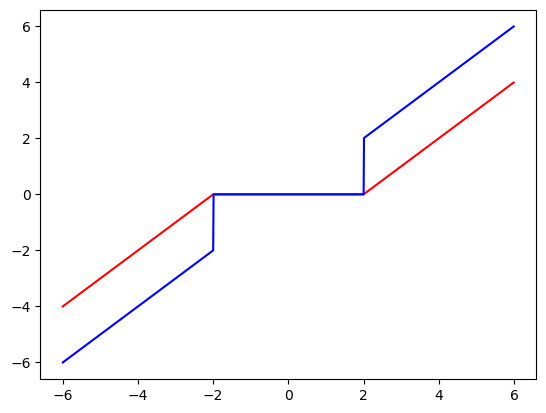

In [5]:
x_axis = np.arange( -6, 6, 0.01 )
tau = 2
res_soft = np.array( [ soft( x, tau ) for x in x_axis ] )
res_hard = np.array( [ hard( x, tau ) for x in x_axis ] )
plt.plot( x_axis, res_soft, "r-" )
plt.plot( x_axis, res_hard , "b-" )

In [6]:
sigma_b = 1
sigma_w = 1
tau = 3
soft_q( 1, sigma_b, sigma_w, tau )

1.0004068481071962

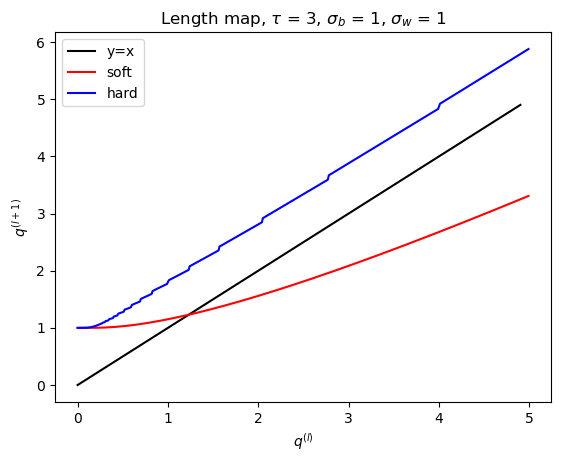

In [7]:

ex = np.arange( 0, 5, 0.01)
res_soft = np.array( [ soft_q( x, sigma_b, sigma_w, tau = 1 ) for x in ex ] )
res_hard = np.array( [ hard_q( x, sigma_b, sigma_w, tau = 1 ) for x in ex ] )
fig, ax = plt.subplots()
ax.plot( ex[ ::10], ex[::10], "k-" )
ax.plot( ex, res_soft, "r-" )
ax.plot( ex, res_hard, "b-" )
plt.title( f"Length map, $\\tau$ = {tau}, $\\sigma_b$ = {sigma_b}, $\\sigma_w$ = {sigma_w}")
plt.xlabel( "$q^{(l)}$")
plt.ylabel( "$q^{(l+1)}$")
plt.legend( [ "y=x", "soft", "hard"])

In future will solve for q* explicitly. For now notice that with these parameters q* = 0.5 for soft activation

In [8]:
q_star_soft = 1.2
q_star_hard = 0.75

In [9]:
plt.close("all")

Produce plots of the length map for different values of the parameters.

In [17]:
from activations import V_soft_analytic
plt.close( "all")
values = [ 0.1, 0.5, 1 ]
q_values = np.linspace( 0, 2, 50 )
for tau in [ 0.1, 0.5, 1, 3, 5 ]:
    fig, ax = plt.subplots()
    for sigma_w, sigma_b in product( values, values ):    
        fp = [ V_soft_analytic(q, sigma_b, sigma_w, tau ) for q in q_values ]
        ax.plot(q_values, fp, label=f'$\sigma_w$={sigma_w}, $\sigma_b$={sigma_b}')

    ax.plot( q_values, q_values, "k-" )
    ax.legend(loc="upper right")
    ax.set_title( f"Tau = {tau}")
    ax.set_xlabel( "q")
    ax.set_ylabel( "V(q)")
    fig.savefig( dir+f"/graphs/Tau={tau}.png" )
    plt.close(fig)


Text(0, 0.5, 'V(q)')

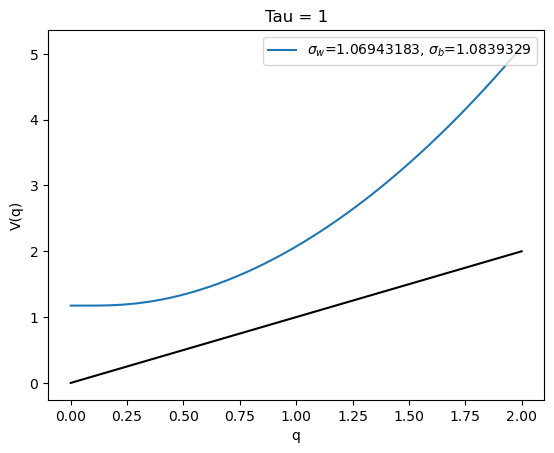

In [22]:
tau = 1 
fig, ax = plt.subplots()
sigma_w = 1.06943183
sigma_b = 1.0839329
fp = [ V_soft_analytic(q, sigma_b, sigma_w, tau ) for q in q_values ]
ax.plot(q_values, fp, label=f'$\sigma_w$={sigma_w}, $\sigma_b$={sigma_b}')

ax.plot( q_values, q_values, "k-" )
ax.legend(loc="upper right")
ax.set_title( f"Tau = {tau}")
ax.set_xlabel( "q")
ax.set_ylabel( "V(q)")
# fig.savefig( dir+f"/graphs/Tau={tau}.png" )
# plt.close(fig)

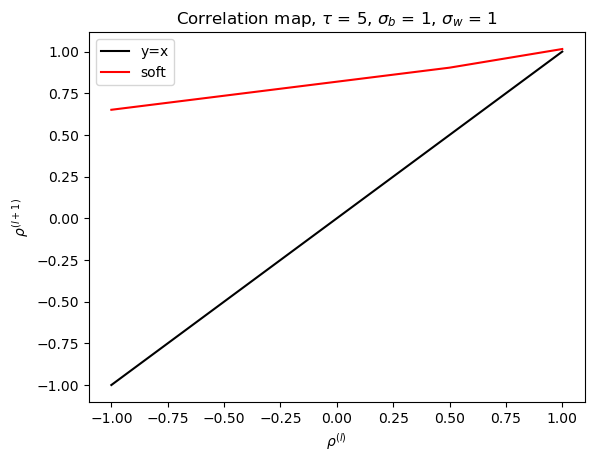

In [11]:
ex = np.array([ -1,0.5, 1])
res_soft = 1/q_star_soft * np.array( [ correlation_map( soft, x,q_star_soft,q_star_soft, sigma_b, sigma_w, 1 ) for x in ex ] )
# Hard activation takes ages to run for some reason
#res_hard = 1/q_star_soft * np.array( [ correlation_map( hard, x, q_star_hard, q_star_soft, sigma_b, sigma_w, 1 ) for x in ex ] )
fig, ax = plt.subplots()
ax.plot( ex[ ::], ex[::], "k-" )
ax.plot( ex, res_soft, "r-")
#ax.plot( ex, res_hard, "b-")
plt.title( f"Correlation map, $\\tau$ = {tau}, $\\sigma_b$ = {sigma_b}, $\\sigma_w$ = {sigma_w}")
plt.xlabel( "$\\rho^{(l)}$")
plt.ylabel( "$\\rho^{(l+1)}$")
plt.legend( [ "y=x", 
    "soft", ]) # Get warning from quadpack about divergent integral for range = +-100. Much better when I tell it the domain is infinite.
    #"hard"])

Questions at the moment - can we do the integrals analytically?
Slope of the correlation map looks very flat - is this good or maybe bad...